In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Wine_clust.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [54]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


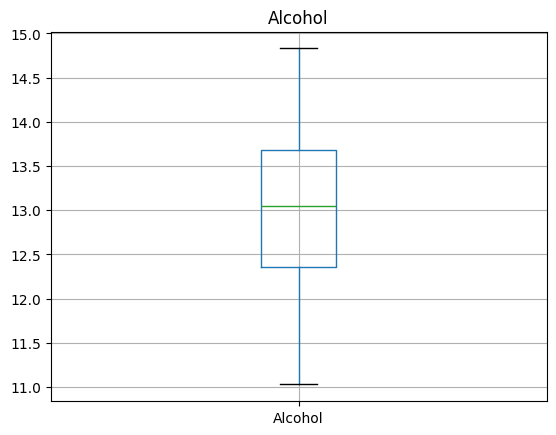

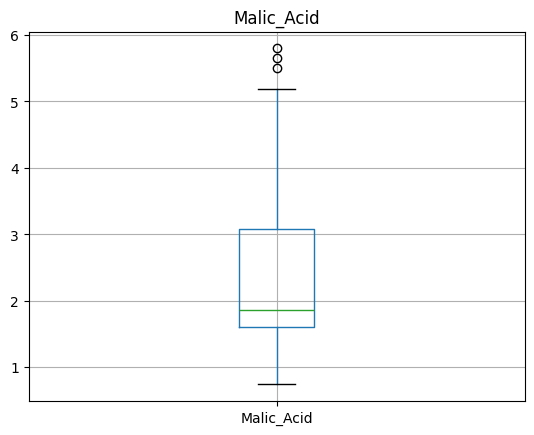

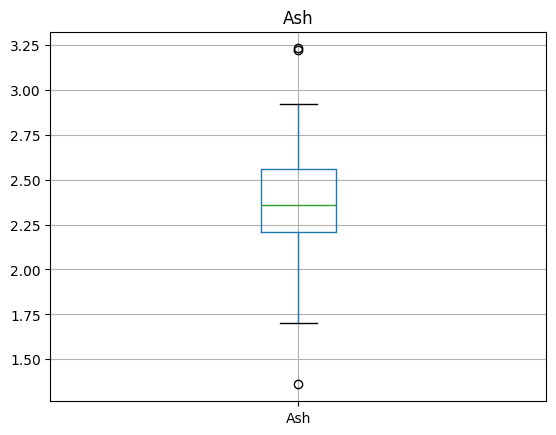

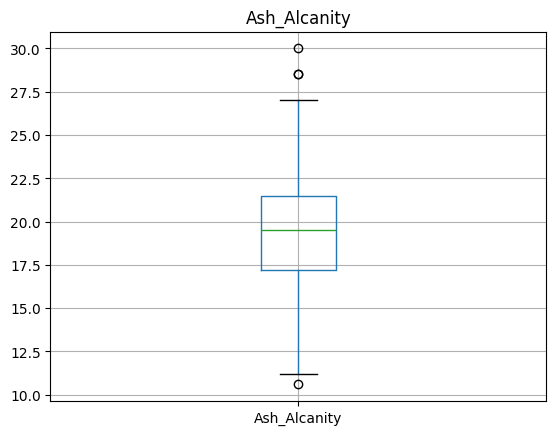

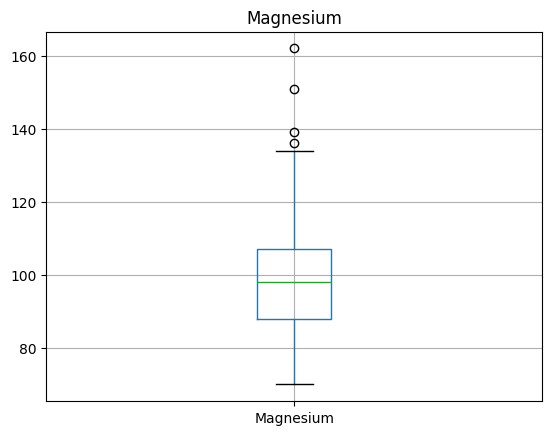

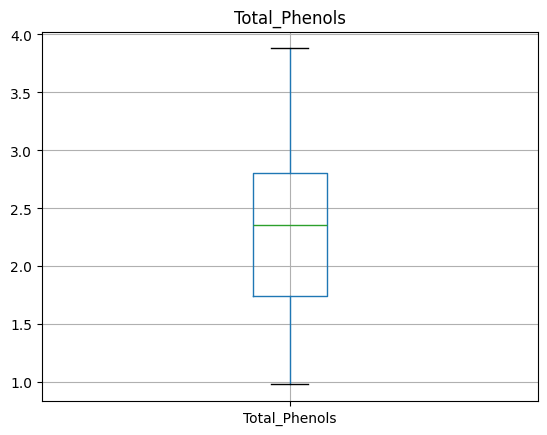

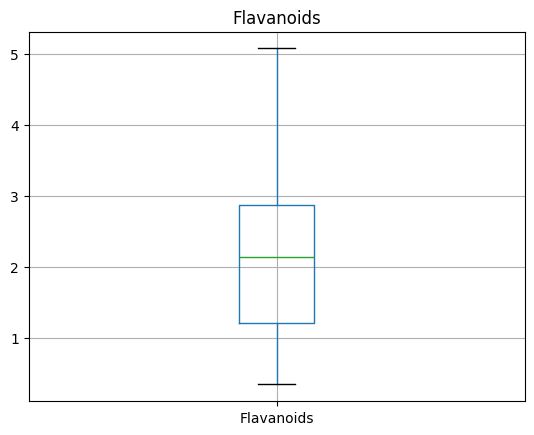

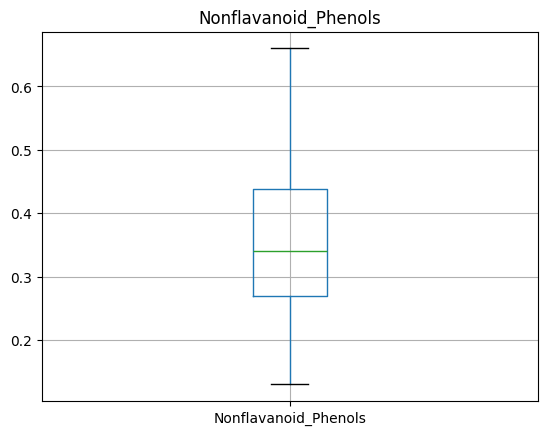

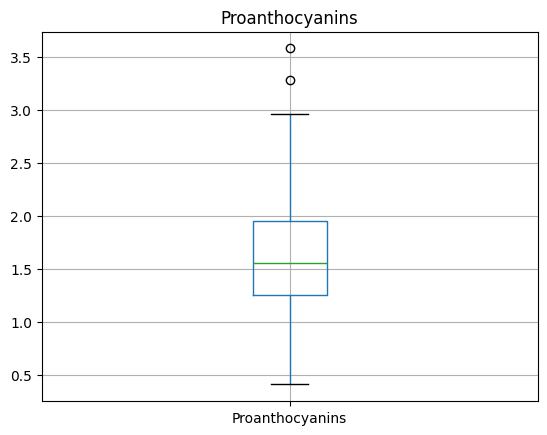

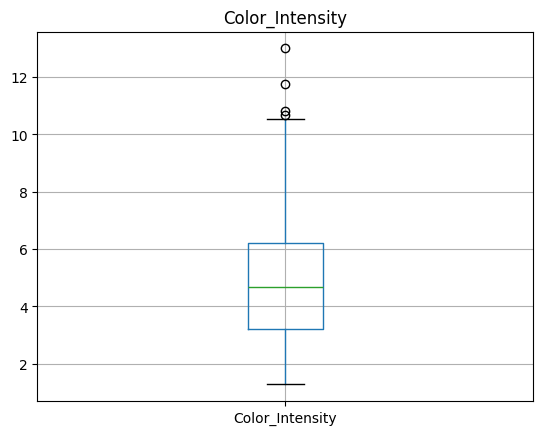

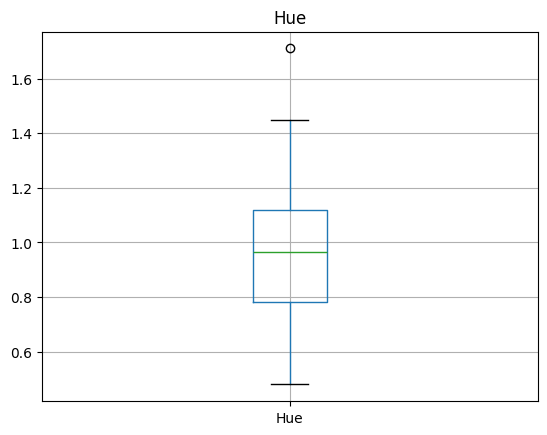

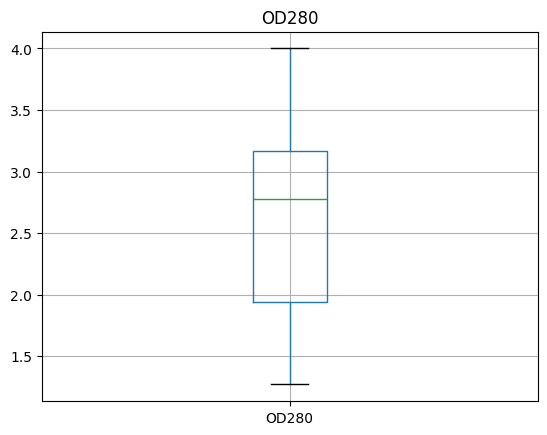

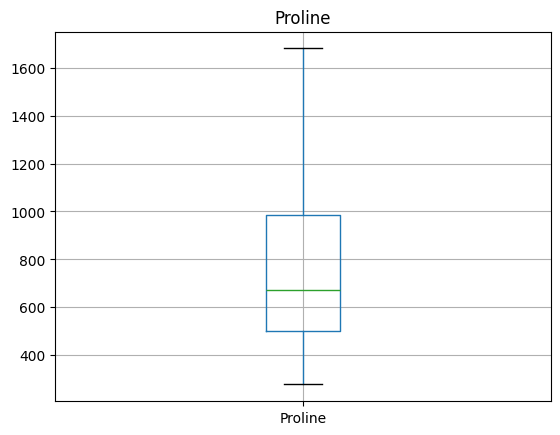

In [55]:
for col in df.columns:
  plt.figure()
  df.boxplot(column = col)
  plt.title(col)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [58]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [59]:
wcss = []
for i in range (1,20):
  kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans =kmeans.fit(x)
  wcss.append(kmeans.inertia_)

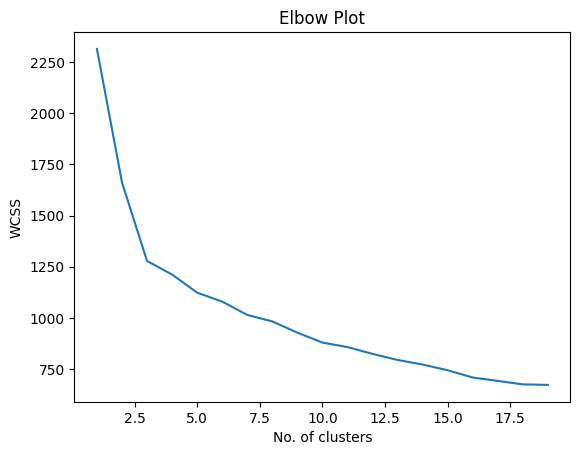

In [60]:
plt.plot(range(1,20),wcss)
plt.title('Elbow Plot')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans =KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [62]:
from sklearn.metrics import silhouette_score

In [48]:
s_score = silhouette_score(x,y_kmeans)
s_score

0.2650328591008738

In [63]:
kmeans =KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [64]:
s_score = silhouette_score(x,y_kmeans)
s_score

0.2848589191898987

Three clusters give better silhouette score.

Agglomerative Clustering

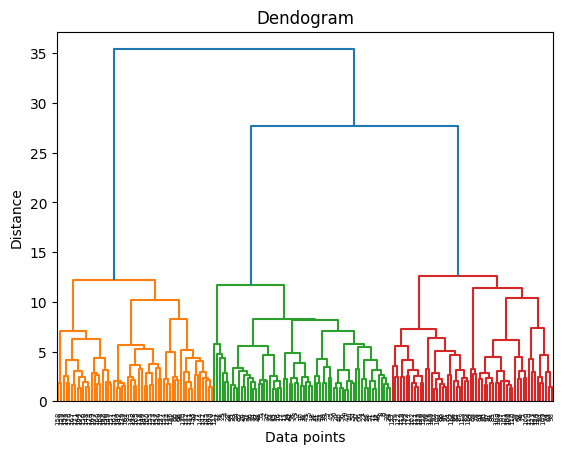

In [65]:
dg = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [74]:
s_score = []
for n_clusters in range(2,5):
  ahc = AgglomerativeClustering(n_clusters, metric='euclidean', linkage='ward')
  y_ahc= ahc.fit_predict(x)
  score = silhouette_score(x,y_ahc)
  s_score.append(score)
  print(f'Silhouette Score for {n_clusters} clusters: {score}')

Silhouette Score for 2 clusters: 0.2670131771272231
Silhouette Score for 3 clusters: 0.2774439826952265
Silhouette Score for 4 clusters: 0.225836659334758


In [81]:
ahc = AgglomerativeClustering(n_clusters =3, metric='euclidean', linkage='ward')
y_ahc= ahc.fit_predict(x)

Three clusters give better clustering

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])


In [83]:
pca_df.head()

,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [84]:
pca_df['KMeans_Cluster'] = y_kmeans
pca_df['AHC_Cluster'] = y_ahc

Text(0, 0.5, 'PCA2')

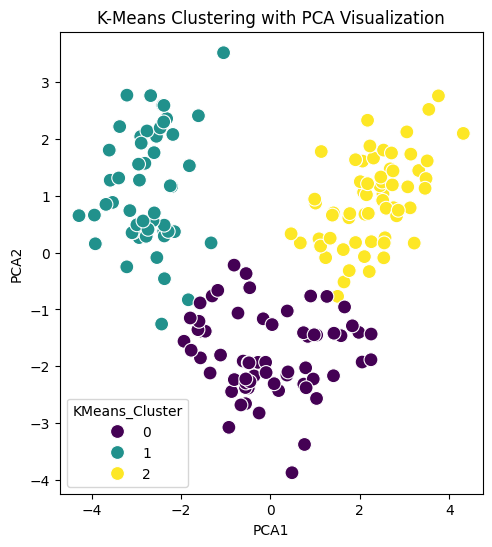

In [85]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


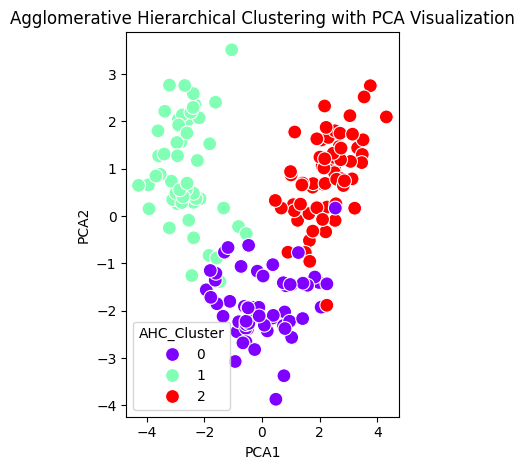

In [86]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='AHC_Cluster', data=pca_df, palette='rainbow', s=100)
plt.title('Agglomerative Hierarchical Clustering with PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()
